In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def read_files(files):
    ret = []
    for f in files:
        ret += [pd.read_csv(f)]
    return ret

STATS_DIR = 'stats'
HASH_FUNCS = ['hash::zero', 'hash::firstChar', 'hash::strlen', 'hash::sum', 'hash::sum(lower size)',
              'hash::ror', 'hash::rol', 'hash::crc32']

stats = read_files([f'{STATS_DIR}/{hash_func}.csv' for hash_func in HASH_FUNCS])
nums = [st['num'] for st in stats]
loads = [st['load'] for st in stats]

In [31]:
def plot_hash_func(num, load_factor, title, xlim):
    plt.figure(figsize=(15, 4), dpi=200)
    plt.xlim(xlim)
    plt.bar(num, load_factor, color='red', width=1.5)
    plt.xlabel('Bucket number')
    plt.ylabel('Load factor')
    plt.title(title)
    plt.savefig(f'graphs/{title}.png')

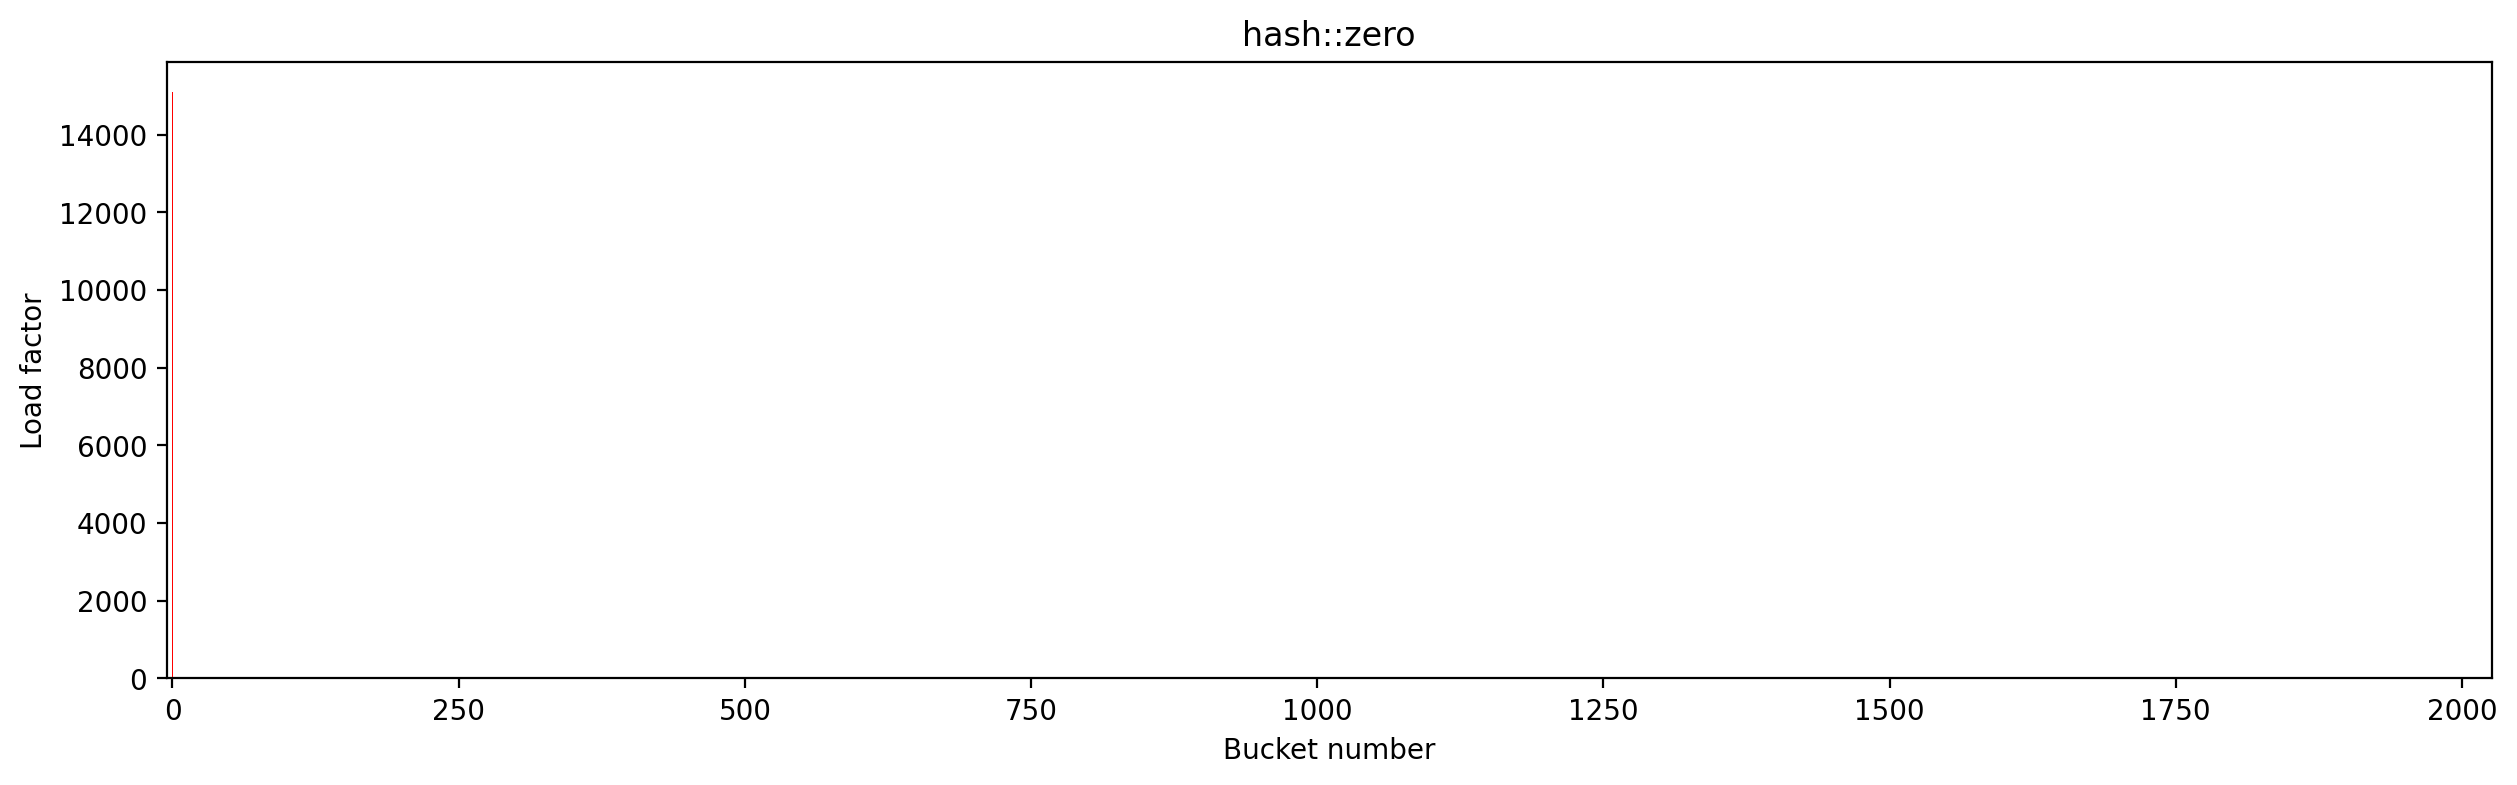

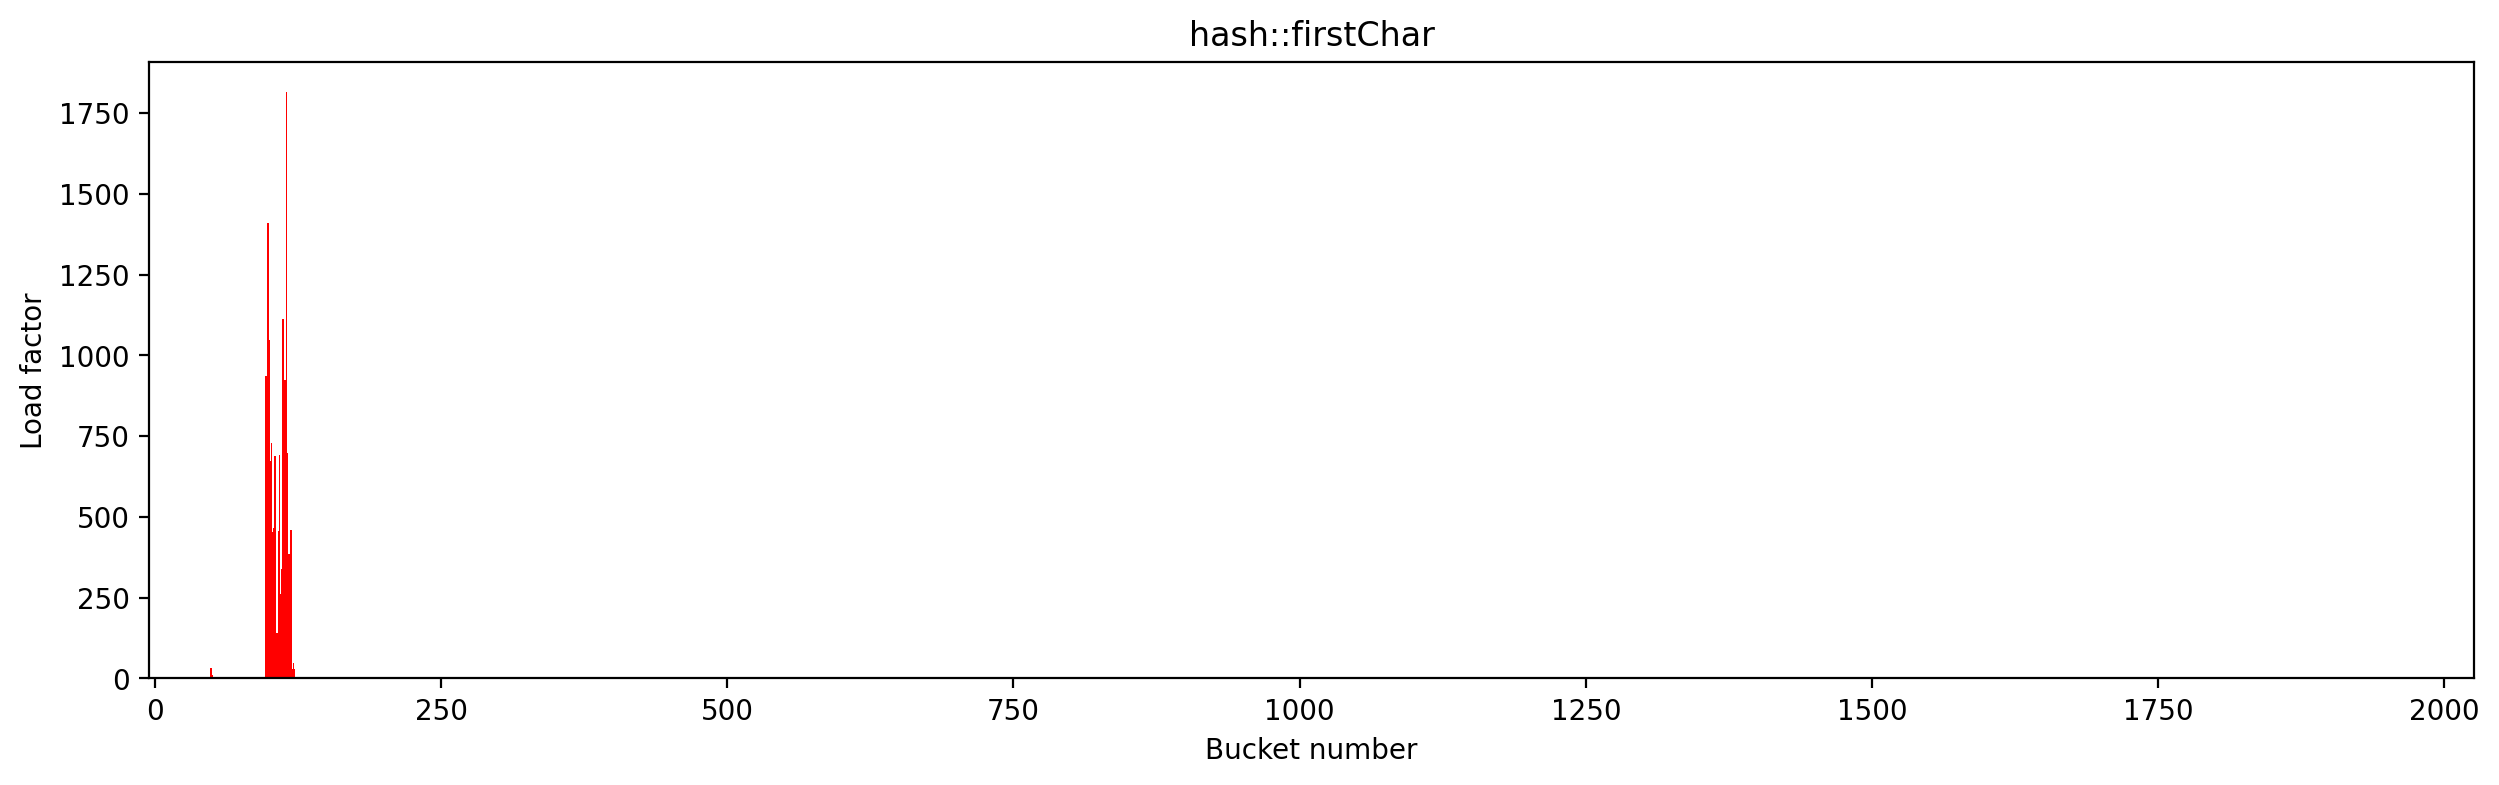

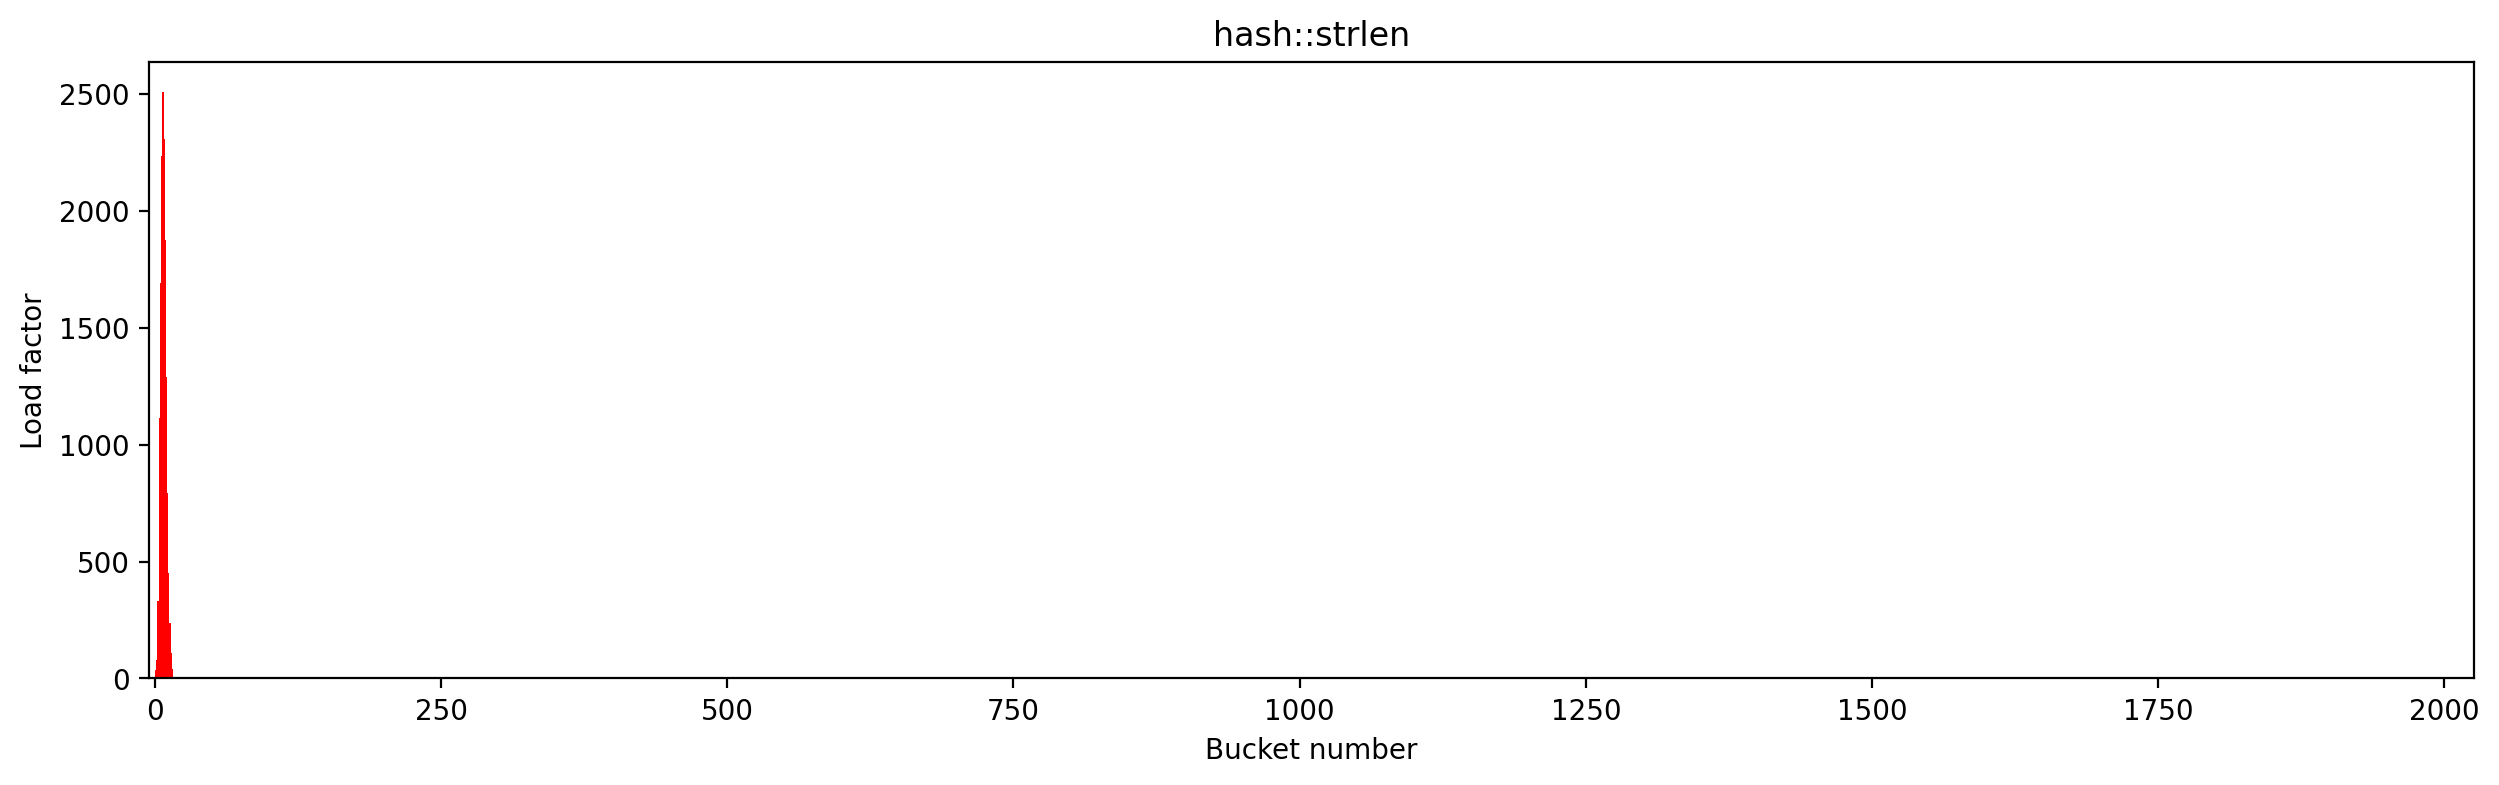

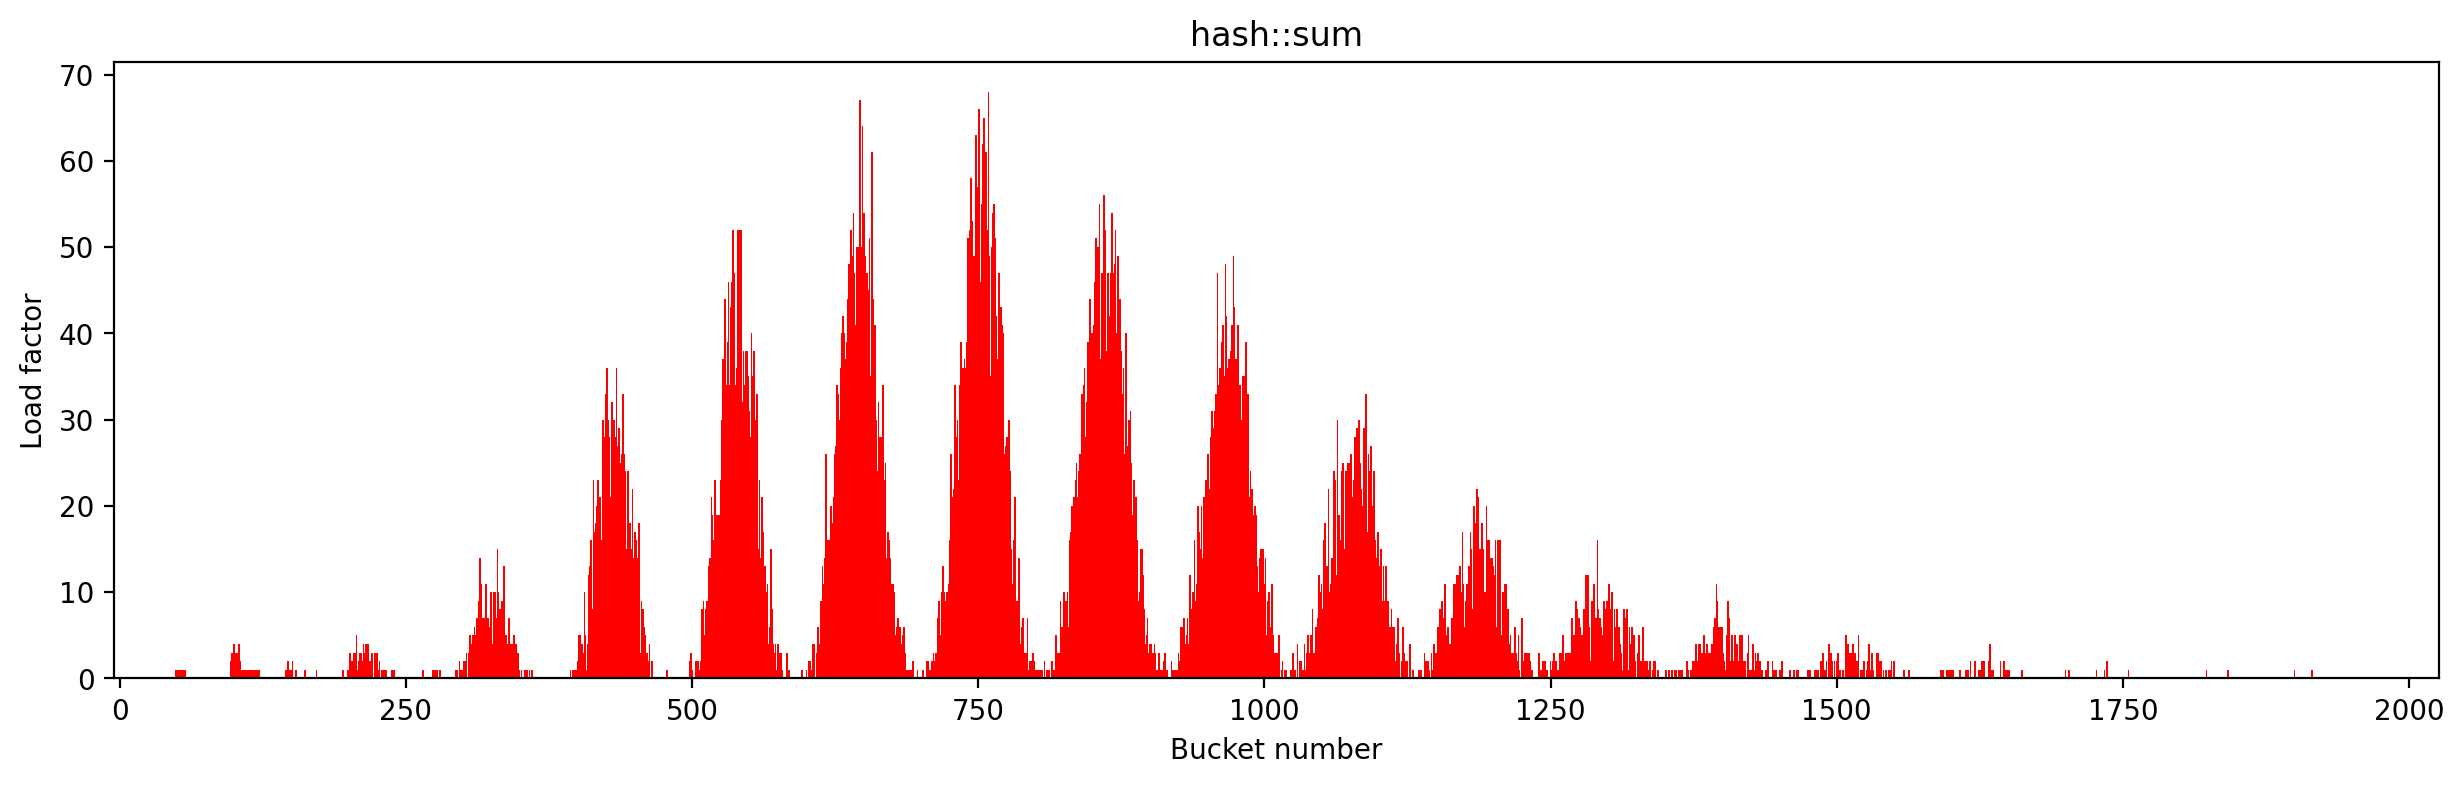

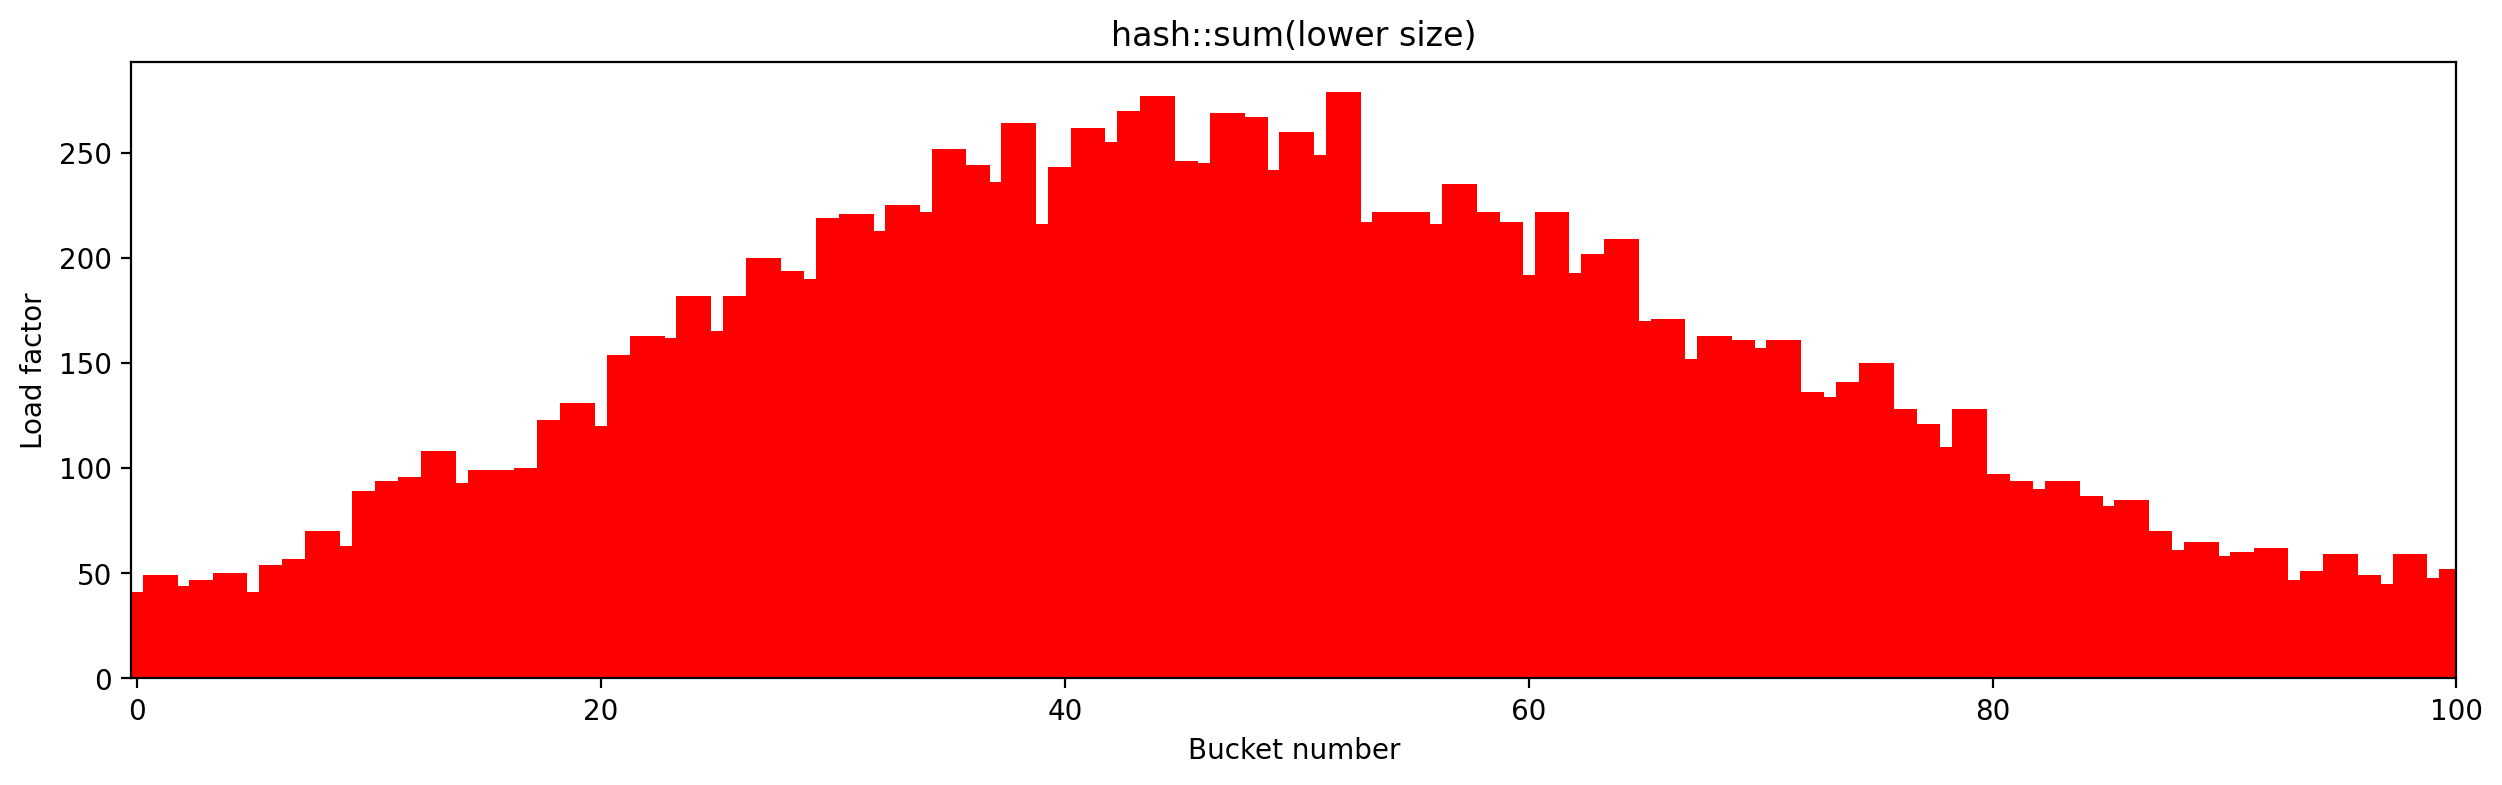

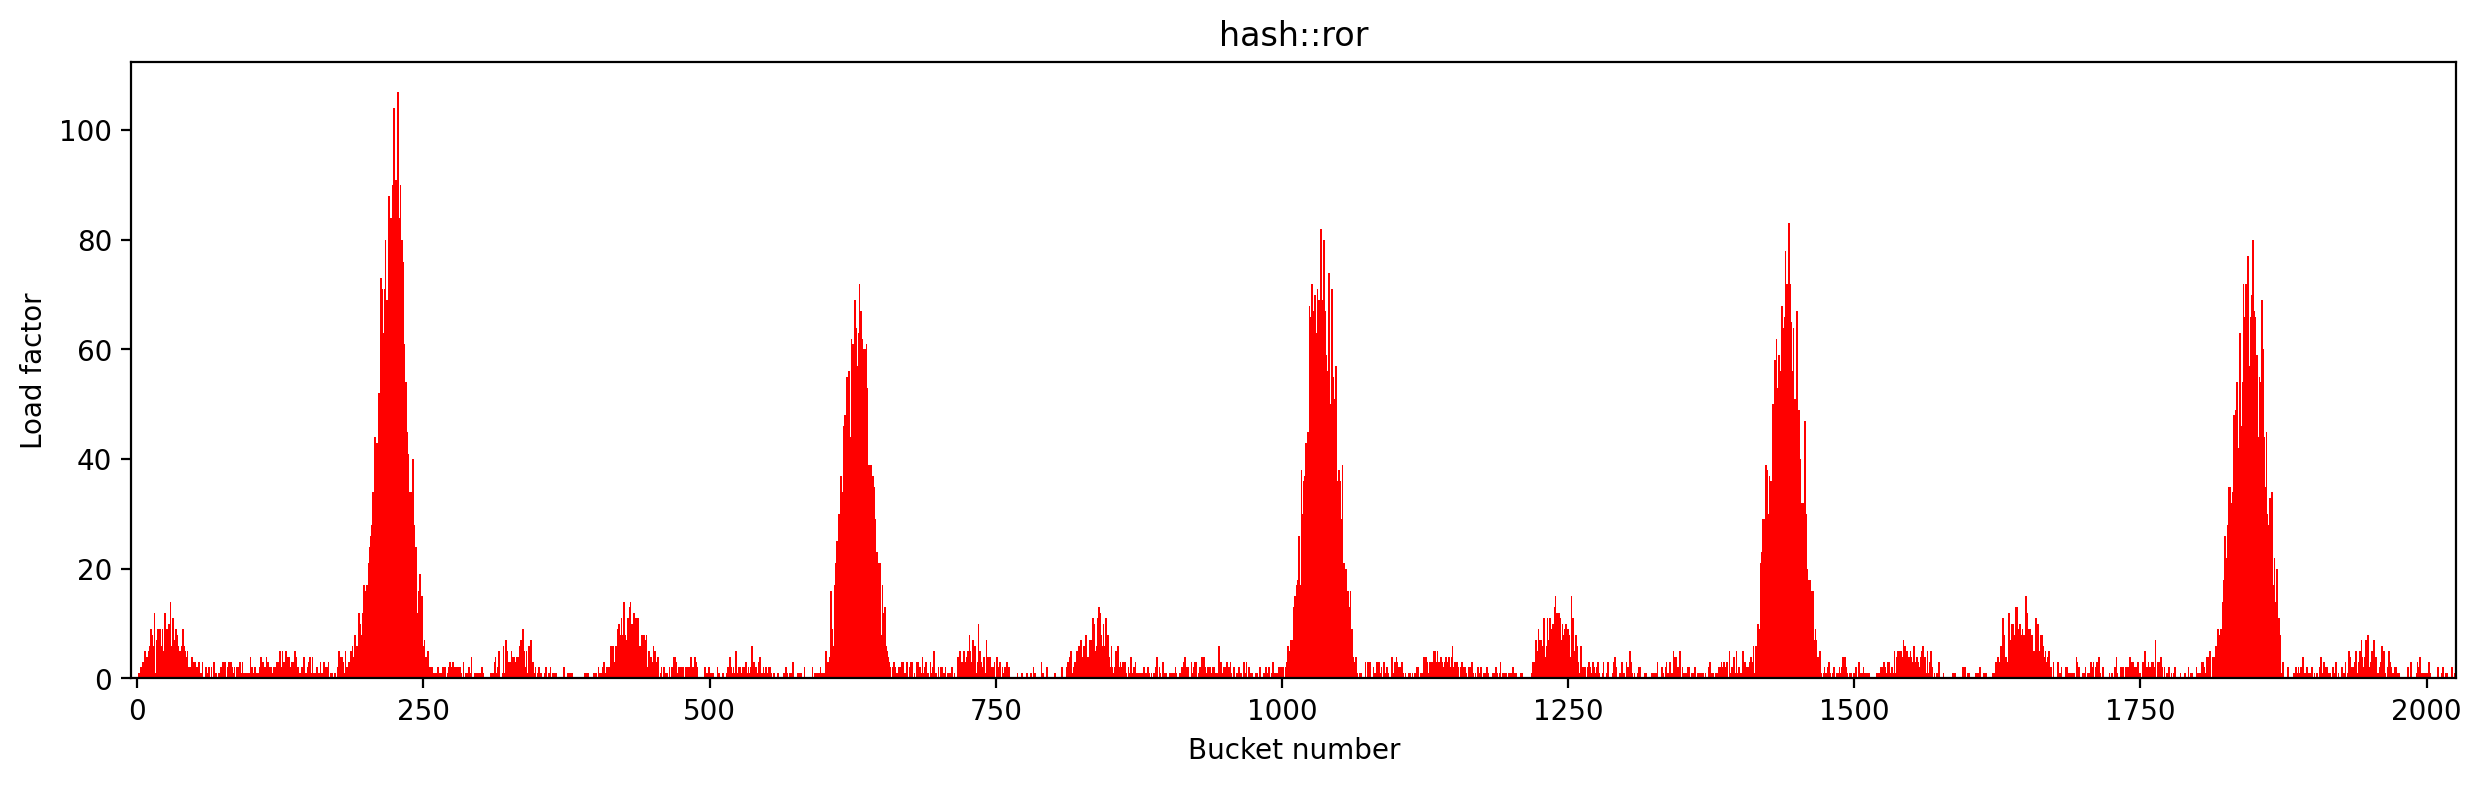

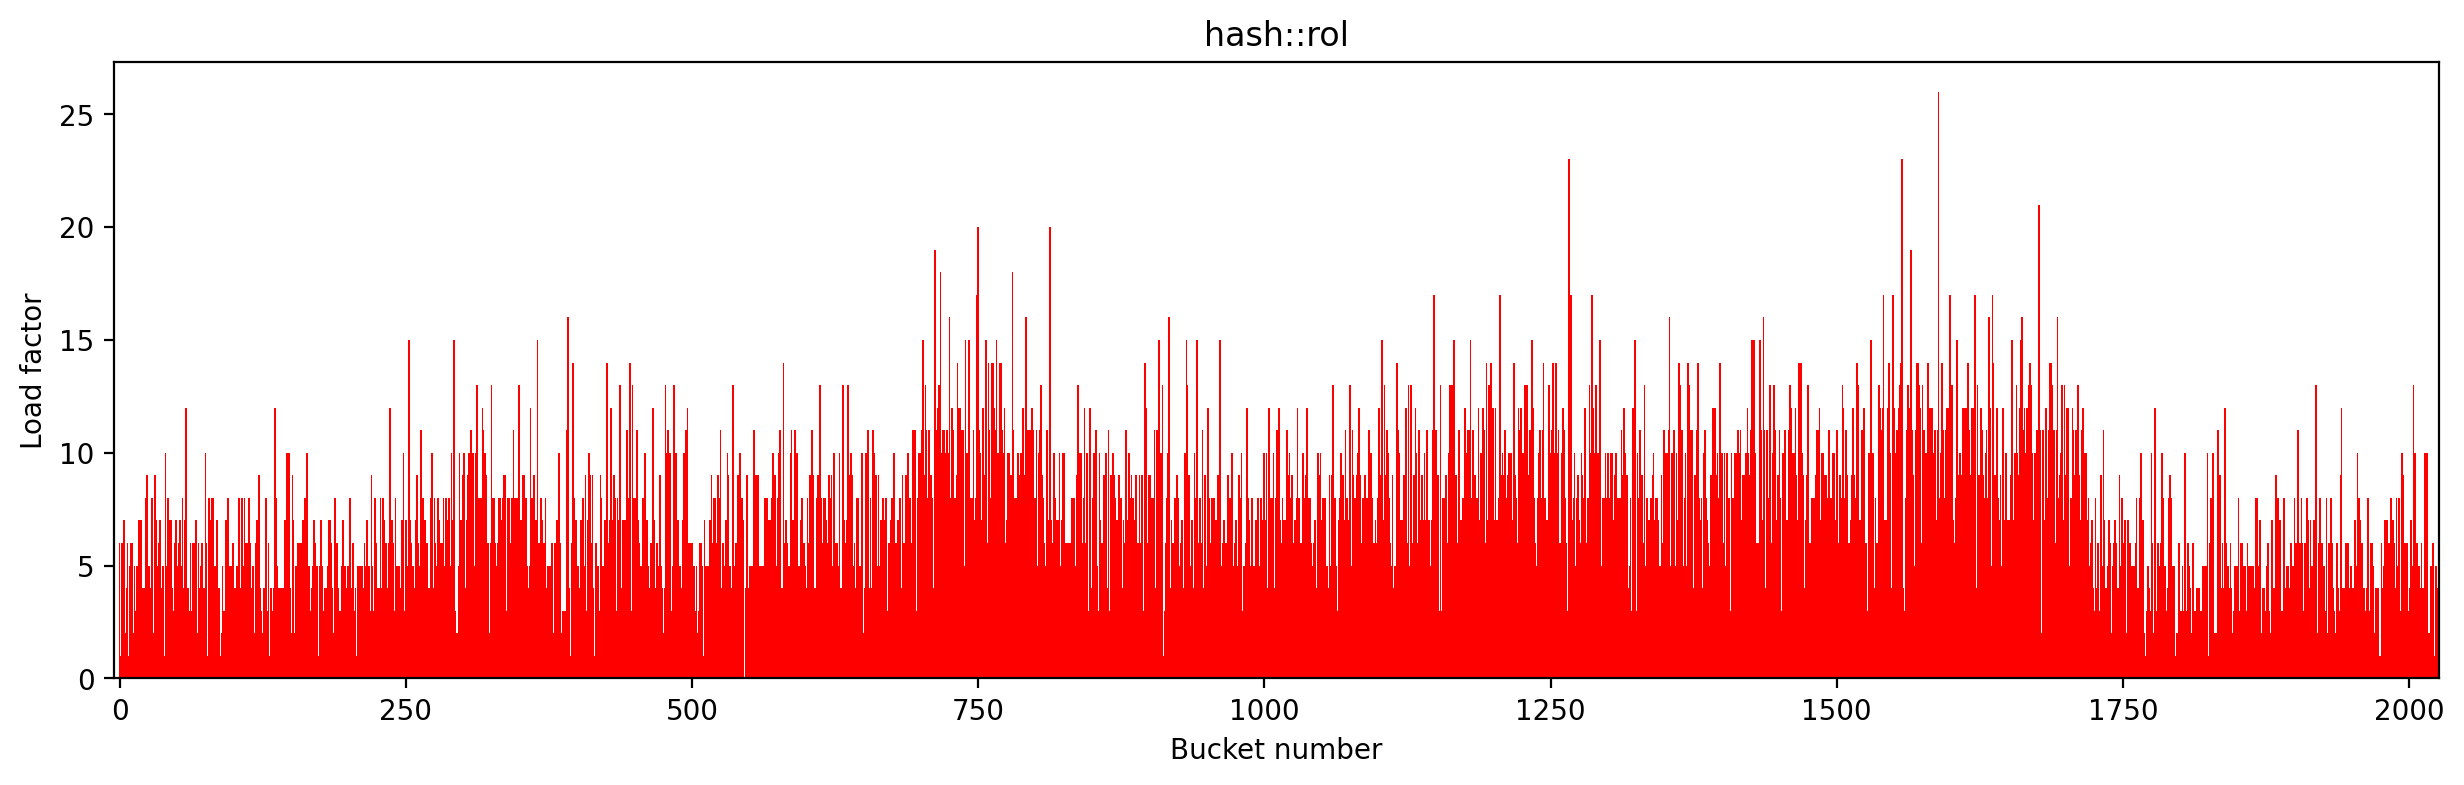

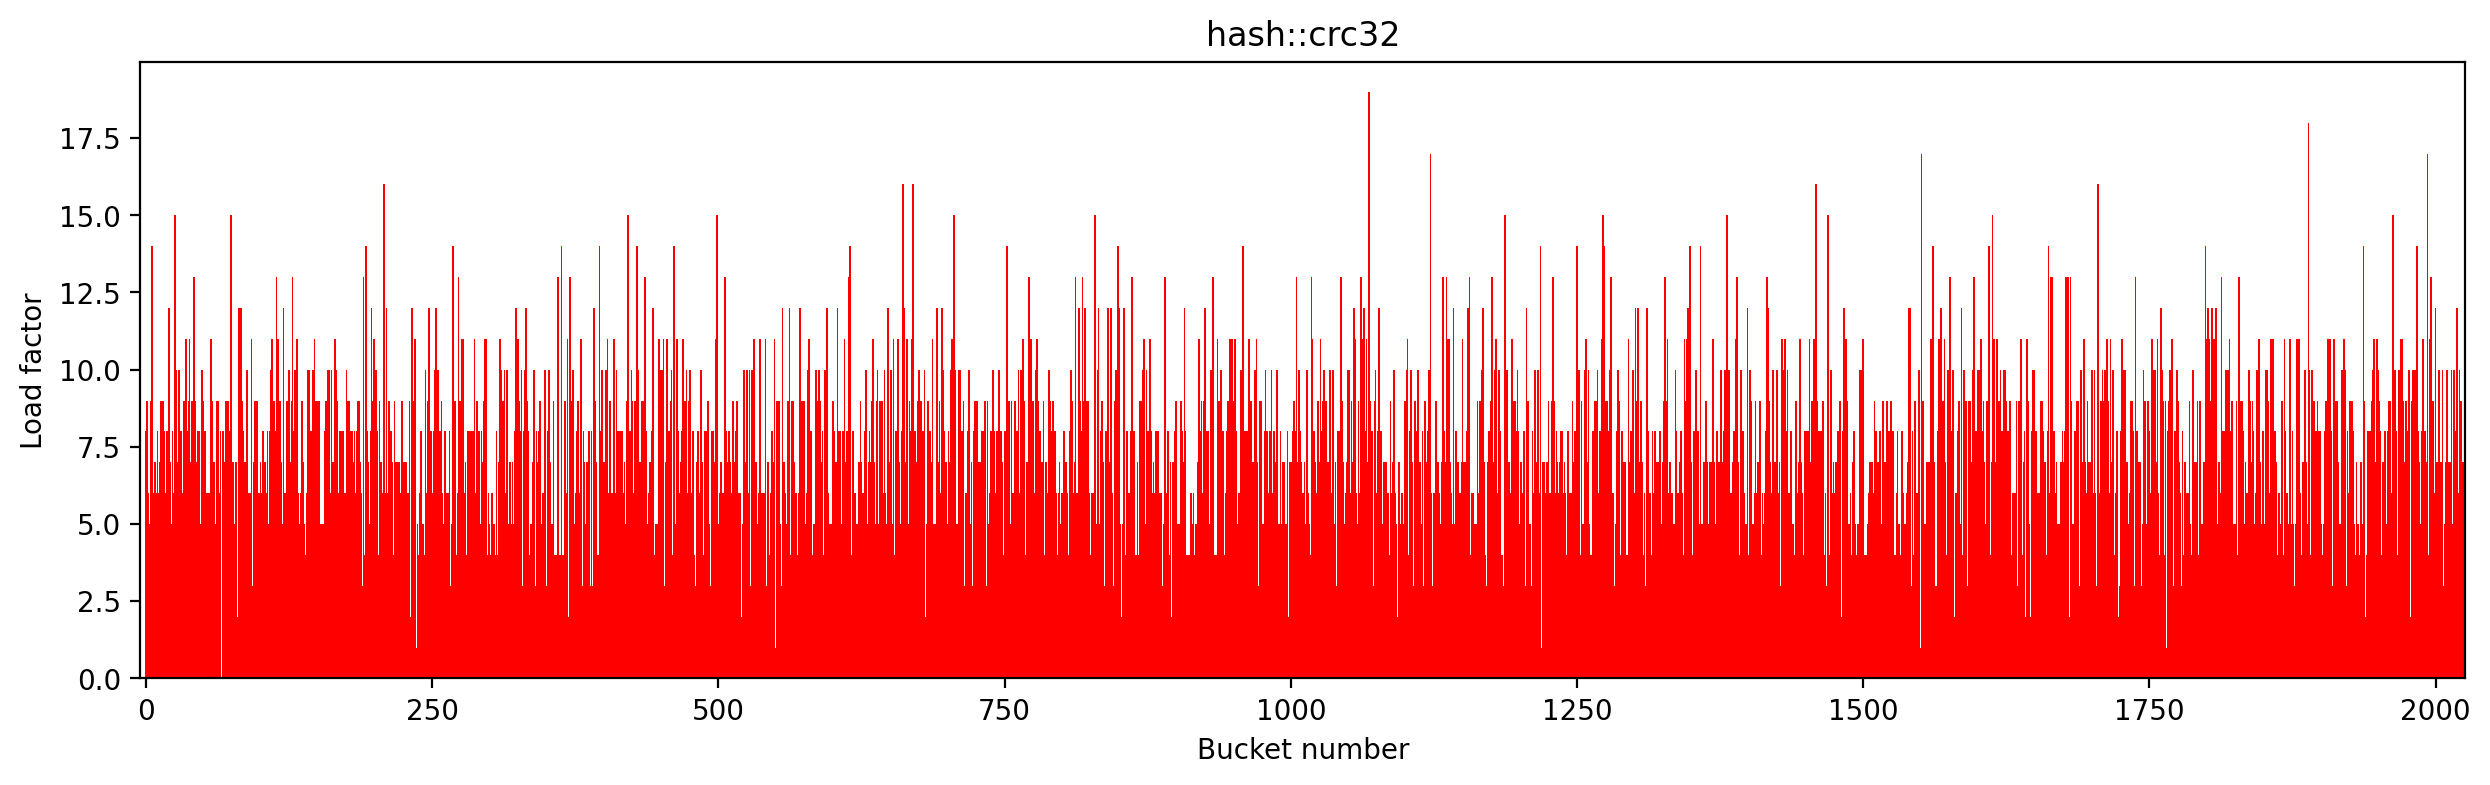

In [32]:
for i in range(nums.__len__()):
    plot_hash_func(nums[i], loads[i], title=HASH_FUNCS[i], xlim=[-0.0025 * max(nums[i]), max(nums[i])])


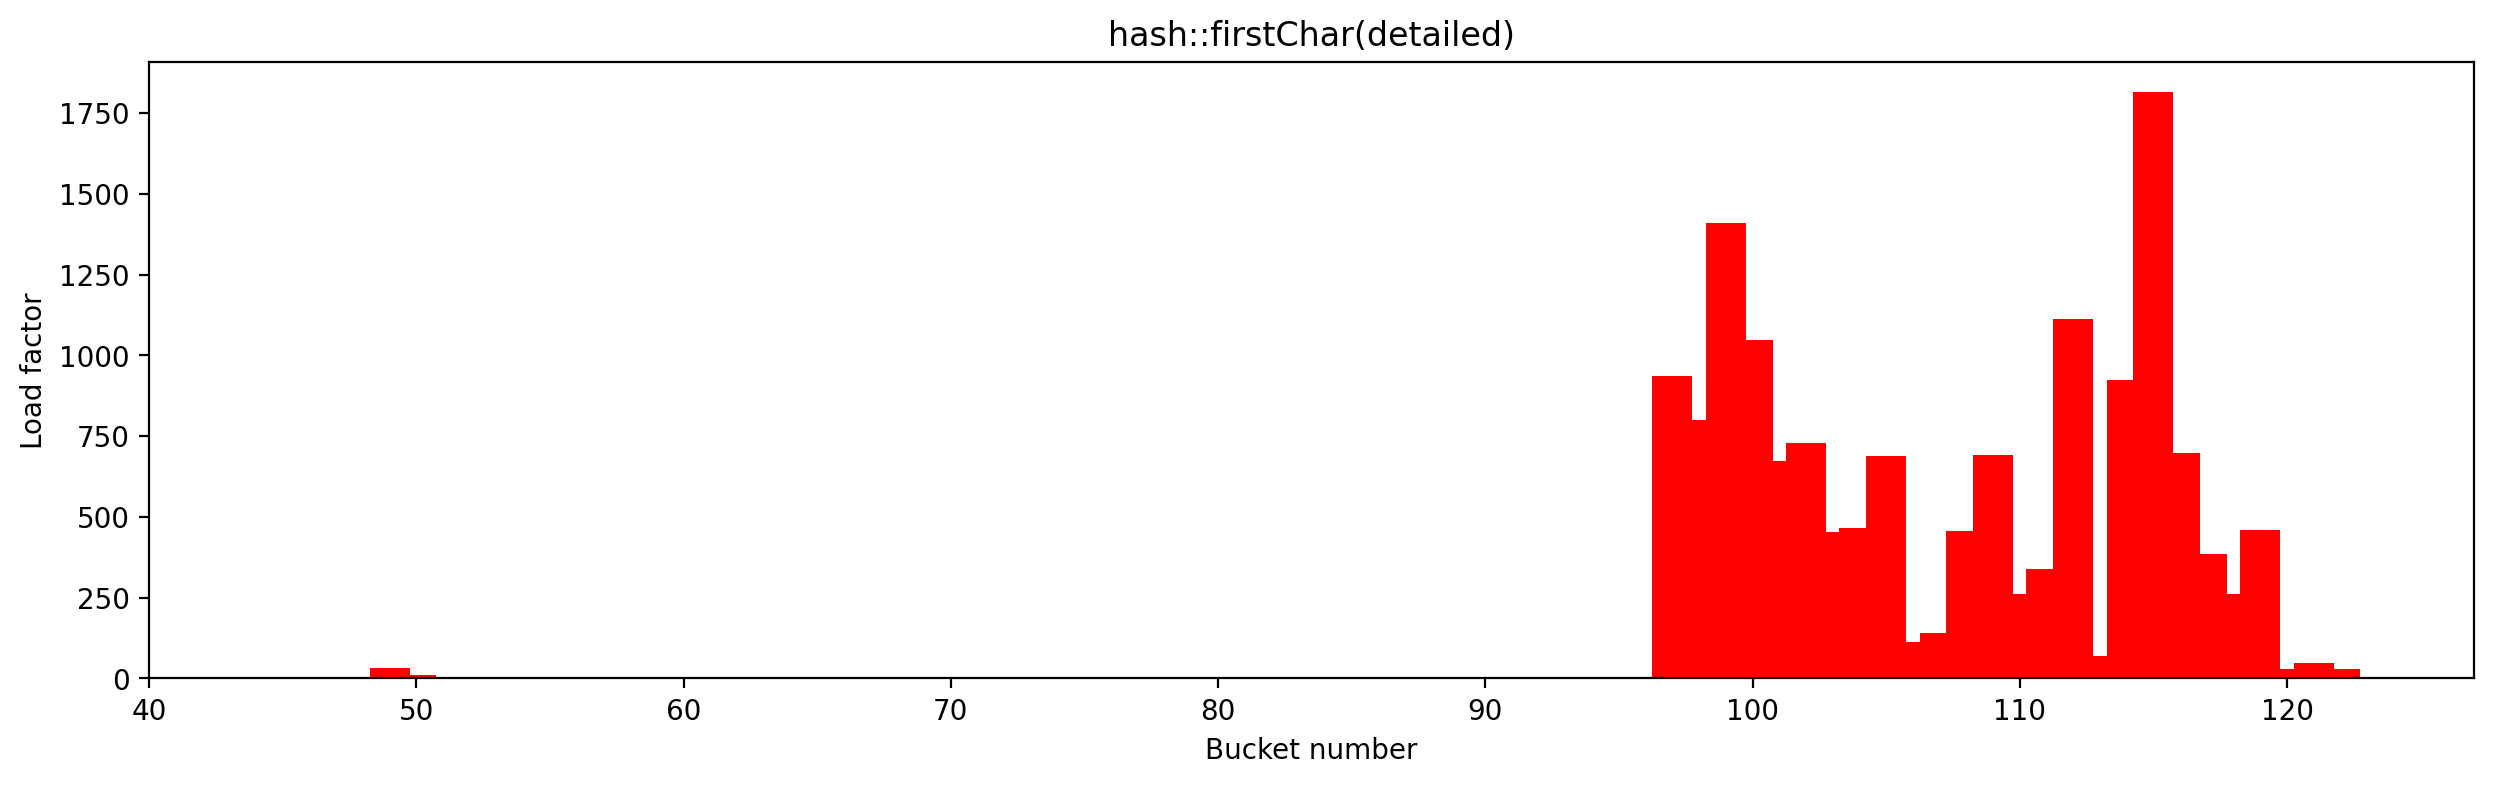

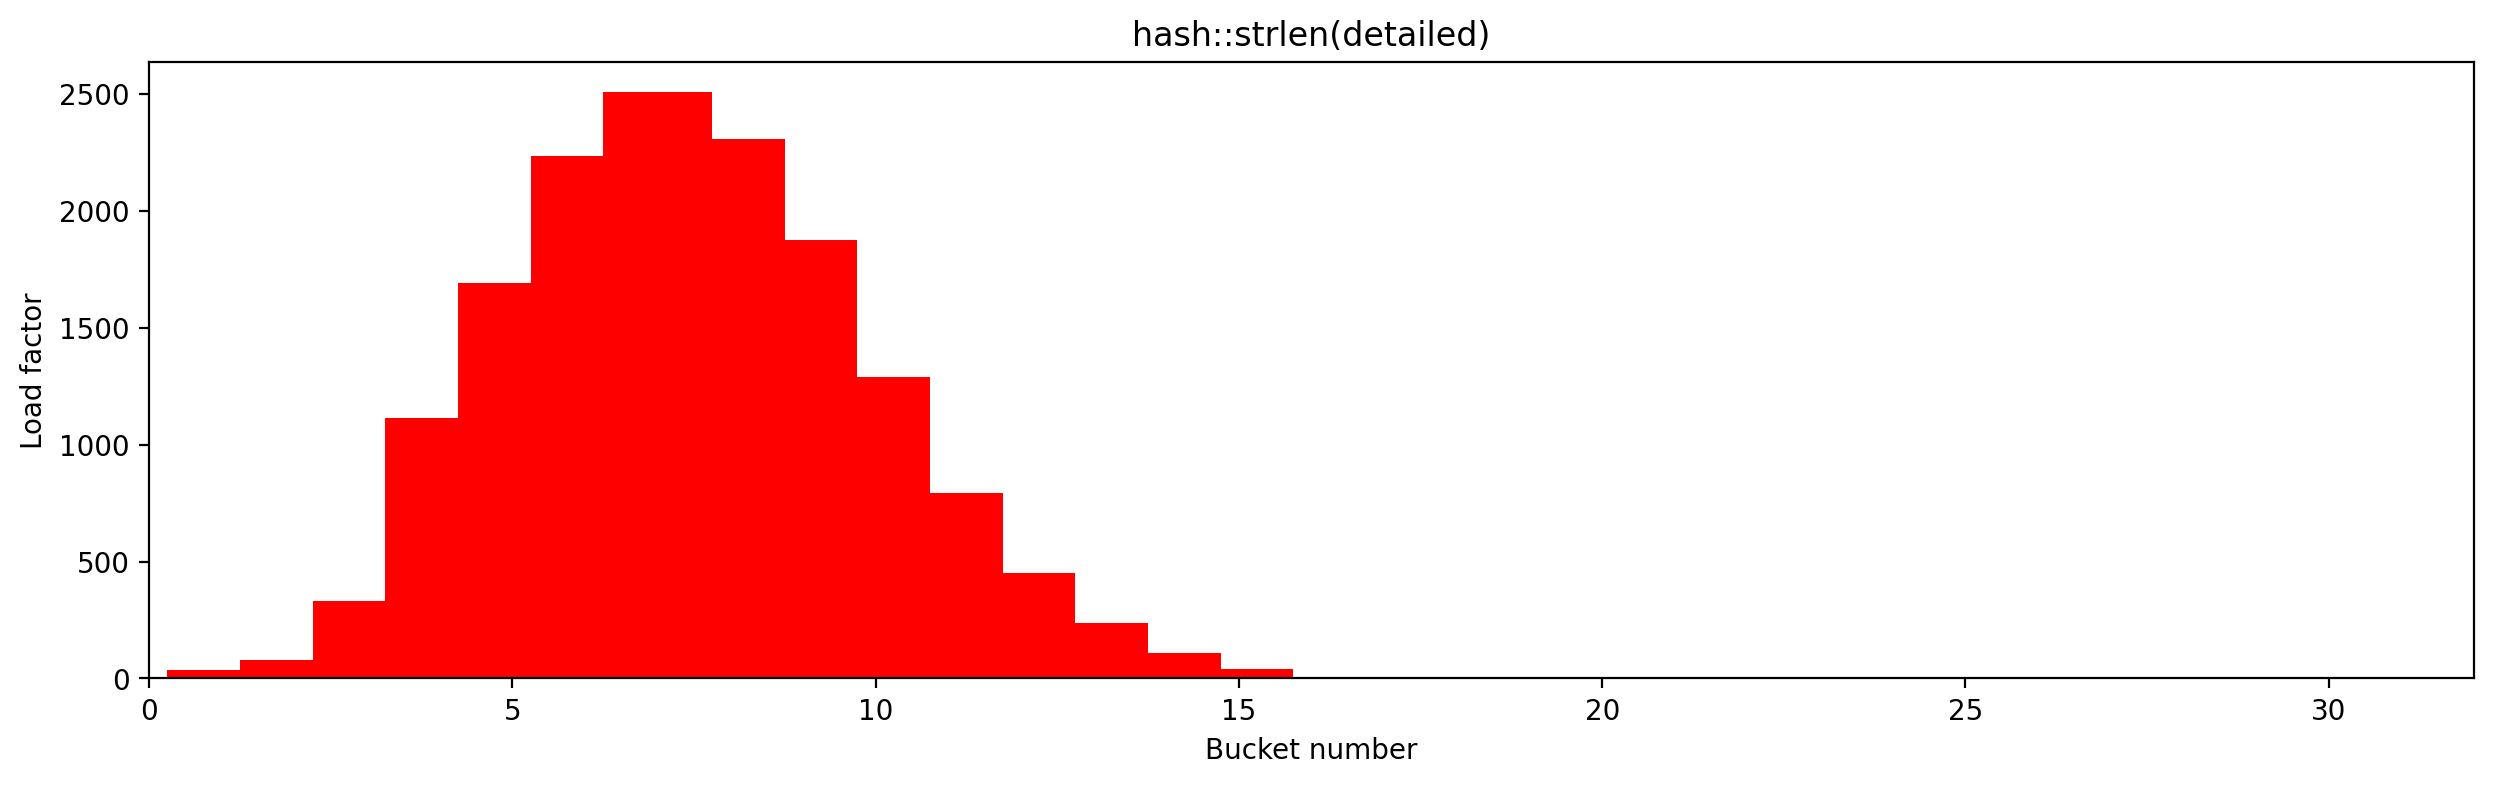

In [33]:
# Detailed bars for hash::firstChar and hash::strlen

xlims = [[0, 0], [40, 127], [0, 32]]

for i in [1, 2]:
    plot_hash_func(nums[i], loads[i], title=f'{HASH_FUNCS[i]}(detailed)', xlim=xlims[i])

In [35]:
print('| Хеш | Стандартное отклонение |')
print('|:---:|:----------------------:|')

for i in range(nums.__len__()):
    print(f'| {HASH_FUNCS[i]} | {np.std(loads[i]):.1f} |')

| Хеш | Стандартное отклонение |
|:---:|:----------------------:|
| hash::zero | 335.4 |
| hash::firstChar | 81.9 |
| hash::strlen | 115.0 |
| hash::sum | 13.0 |
| hash::sum(lower size) | 74.5 |
| hash::ror | 16.0 |
| hash::rol | 3.3 |
| hash::crc32 | 2.7 |
